# THE 'MAGISTER DIXIT' NOTEBOOK
## *Lecture Notes of the Old University of Leuven (1425-1797)*

In [3]:
# Import an image
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://lectio.ghum.kuleuven.be/lectio/themes/lectio/images/caroussel/bg3.jpg", width=900, height=600)



This notebook will guide you through the exploration of the [*Magister Dixit Collection*](http://lectio.ghum.kuleuven.be/lectio/magister-dixit)'s metadata. <br>The data set consists of 552 records, corresponding to the descriptive metadata of 552 manuscripts containing the lecture notes of the Old University of Leuven (XVI-XVIII century). The manuscripts, which are physically kept in different libraries, have been fully digitised and virtually re-collected in an online repository accessible through [Lectio](http://lectio.ghum.kuleuven.be/lectio/solr-search?q=*&facet=itemtype%3A%22Object%22) and through [Limo](https://limo.libis.be/primo-explore/collectionDiscovery?vid=KULeuven&inst=KUL&collectionId=81411248550001488).
The full dataset **Magister_Dixit_Collection_Dataset.csv** is available as open data for digital humanities research and other creative use on [KU Leuven's Libraries's GitHub](https://github.com/KU-Leuven-Libraries). <br>This Notebook uses a simplified version of the original data set (**Magister_Dixit_professional_groups.csv**) available [here](https://github.com/martinaverna/Magister-Dixit-Metadata-Exploration). Further information on how the data has been processed can be found in the repository's [Read Me](https://github.com/martinaverna/Magister-Dixit-Metadata-Exploration/blob/master/README.md).

The following existing notebooks and collections of notebooks have been taken as inspirational for this project: 
- [GLAM Workbench](https://glam-workbench.github.io)
- [Tribune collection metadata magic](https://nbviewer.jupyter.org/github/GLAM-Workbench/ozglam-data-records-of-resistance/blob/master/Exploring-Tribune-negatives-metadata.ipynb)
- [Moving Image Notebook](https://github.com/hibernator11/notebook-texts-example/blob/master/Dataset-Extraction-Example.ipynb)


## TABLE OF CONTENTS

1. [Set up the Notebook and connect to the data set](#section_1)
2. [Explore the data set](#section_2) <br>
2.1 Display options<br>
2.2 A look inside the data<br>
2.3 Describe the data with the .describe() function

3. [Analyse the data set: counting, grouping, aggregation](#section_3)<br>
3.1 Dates<br>
3.2 Printers<br>
3.3 Pedagogies<br>
3.4 Main titles<br>
3.5 Search words<br>
3.6 Professors<br>
3.7 Students<br>
3.8 Contributors
4. [Let's make visualizations!](#section_4)<br>
4.1 Distribution of manuscripts per year<br>
4.2 Distribution of manuscripts per Faculty<br>
4.4. Distribution of manuscripts per Collection


## If you are using Binder please run the following:

In [4]:
#If you are using conda:

#import sys
#!conda install --yes --prefix {sys.prefix} pandas

In [5]:
# if you are using pip:
#import sys
#!{sys.executable} -m pip install pandas

<a id='section_1'></a>
# 1. SET UP THE NOTEBOOK AND CONNECT TO THE DATA SET

Importing PANDAS is the first step to set up the Notebook. Other Python libraries can be imported later, or whenever needed.
Then, a connection between the Notebook and the dataset must be created. <br>
XML data format can easily be converted to CSV directly in the Notebook. In this case tough, we already have a CSV file. 

In [6]:
# Import Pandas and other Libraries needed for interacting with Python
import pandas as pd
import os
import numpy as np


In [7]:
# Get to the dataset!
# "df" = Pandas DataFrame
# The dataset must be connected through its GitHub URL
df = pd.read_csv('https://raw.githubusercontent.com/martinaverna/Magister-Dixit-Metadata-Exploration/master/Magister_Dixit_professional_groups.csv')

<a id='section_2'></a>
# 2. EXPLORE THE DATA SET

Preview and examine data in a Pandas DataFrame:

In [8]:
# Print the columns' name
df.columns

Index(['Record_ID', 'URL_Limo', 'Date_type', 'Date_1', 'Date_2', 'Main_title',
       'Varying_title(s)', 'Physical_extent', 'Binding',
       'Description_of_graphic_material', 'General_notes', 'Details',
       'Genre/form', 'Illustrations', 'Contributors', 'Professor', 'Student',
       'Author_original_work', 'Other', 'Printer', 'Engraver', 'Illustrator',
       'Etcher', 'Adapter', 'Artist', 'Place_of_production',
       'Place_of_production_2', 'IE', 'URL', 'Label', 'Collection'],
      dtype='object')

In [9]:
# Print number of rows, number of columns
df.shape

(552, 31)

In [10]:
# Number of records
len(df)

552

## 2.1 Display options

When displaying a dataset, by default Pandas only shows a limited number of rows. 
In order to change this number, use the function *pd.set_option('display.max_rows', number_of_rows)*. <br>
Example: *pd.set_option('display.max_rows', 50)* will display 50 rows. <br>
The notebook can be also expanded to full page using: <br>
*from IPython.core.display import display, HTML*
*display(HTML("<style>.container { width:100% !important; }</style>"))*

In [11]:
# In order to show all the rows, number_of_rows must be set to None.
pd.set_option('display.max_rows', None)

In [12]:
# Print the entire dataset
print(df)

            Record_ID                                           URL_Limo  \
0    9984875010101488  https://limo.libis.be/primo-explore/search?que...   
1    9985450340101488  https://limo.libis.be/primo-explore/search?que...   
2    9984817940101488  https://limo.libis.be/primo-explore/search?que...   
3    9984913130101488  https://limo.libis.be/primo-explore/search?que...   
4    9984882080101488  https://limo.libis.be/primo-explore/search?que...   
5    9984889740101488  https://limo.libis.be/primo-explore/search?que...   
6    9984813000101488  https://limo.libis.be/primo-explore/search?que...   
7    9984831760101488  https://limo.libis.be/primo-explore/search?que...   
8    9984915010101488  https://limo.libis.be/primo-explore/search?que...   
9    9985449980101488  https://limo.libis.be/primo-explore/search?que...   
10   9984909340101488  https://limo.libis.be/primo-explore/search?que...   
11   9984806480101488  https://limo.libis.be/primo-explore/search?que...   
12   9984809

As the Magister Dixit metadata mostly contains long strings of text values, the printing above does not display the dataset nicely. Let's try to display one column only:

In [13]:
# Show only one column
df['Label']

0                       Abdij van Berne Heeswijk Ms. 251
1                       Abdij van Berne Heeswijk Ms. F11
2                        Abdij van Berne Heeswijk Ms. K1
3                       Abdij van Berne Heeswijk Ms. K12
4                       Abdij van Berne Heeswijk Ms. K13
5                       Abdij van Berne Heeswijk Ms. K14
6                        Abdij van Berne Heeswijk Ms. K6
7                        Abdij van Berne Heeswijk Ms. K8
8                        Abdij van Berne Heeswijk Ms. K9
9                        Abdij van Berne Heeswijk Ms. M5
10                       Abdij van Berne Heeswijk Ms. M9
11                       Abdij van Berne Heeswijk Ms. O1
12                       Abdij van Berne Heeswijk Ms. O2
13                      Abdij van Berne Heeswijk Ms. R11
14                       Abdij van Berne Heeswijk Ms. R2
15     Archives de l'Université catholique de Louvain...
16     Archives de l'Université catholique de Louvain...
17     Archives de l'Université

## 2.2 A look inside the data

In [14]:
# Print the top 5 rows
df.head(5)

Record_ID                                           URL_Limo  \
0  9984875010101488  https://limo.libis.be/primo-explore/search?que...   
1  9985450340101488  https://limo.libis.be/primo-explore/search?que...   
2  9984817940101488  https://limo.libis.be/primo-explore/search?que...   
3  9984913130101488  https://limo.libis.be/primo-explore/search?que...   
4  9984882080101488  https://limo.libis.be/primo-explore/search?que...   

  Date_type Date_1 Date_2              Main_title  \
0         s   1749   \\\\              Dialectica   
1         m   1613   1616  Scripta de sacramentis   
2         s   1643   \\\\                  Logica   
3         q   1701   1797  De logica et de sphæra   
4         s   1766   \\\\                 Physica   

                                    Varying_title(s)    Physical_extent  \
0  Dialectices sive Manuductio ad logicam Lovanie...       341 p.$bill.   
1                                                NaN  278, 10* f.$bill.   
2  Dictata magis principalia in universam Logicam...  161, 145 f.$bill.   
3              Universa philosophia. De cosmographia       319 f.$bill.   
4  Phisica dictata a reverendis d=nis d=nis Verbe...       312 f.$bill.   

                                             Binding  \
0  Brown calf leather binding ; gold tooled spine...   
1  Parchment binding ; manuscript title in black ...   
2  Brown calf leather binding ; blind stamped boa...   
3  Brown calf leather binding ; blind stamped boa...   
4  Cardboard binding ; half leather binding ; cor...   

  Description_of_graphic_material  ... Illustrator Etcher Adapter Artist  \
0                       \\$ePaper  ...         NaN    NaN     NaN    NaN   
1                       \\$ePaper  ...         NaN    NaN     NaN    NaN   
2                       \\$ePaper  ...         NaN    NaN     NaN    NaN   
3                       \\$ePaper  ...         NaN    NaN     NaN    NaN   
4                       \\$ePaper  ...         NaN    NaN     NaN    NaN   

                     Place_of_production  \
0    Leuven (Louvain) Pedagogie onbekend   
1                       Leuven (Louvain)   
2     Leuven (Louvain) Pedagogie De Valk   
3    Leuven (Louvain) Pedagogie onbekend   
4  Leuven (Louvain) Pedagogie Het Varken   

                   Place_of_production_2         IE  \
0      Faculty of Arts, pedagogy unknown  IE5071870   
1                                    NaN  IE5052929   
2  Faculty of Arts, Paedagogium Falconis  IE5062854   
3      Faculty of Arts, pedagogy unknown  IE5054670   
4     Faculty of Arts, Paedagogium Porci  IE5068394   

                                                 URL  \
0  http://resolver.libis.be/IE5071870/representation   
1  http://resolver.libis.be/IE5052929/representation   
2  http://resolver.libis.be/IE5062854/representation   
3  http://resolver.libis.be/IE5054670/representation   
4  http://resolver.libis.be/IE5068394/representation   

                              Label      Collection  
0  Abdij van Berne Heeswijk Ms. 251  BERNE HEESWIJK  
1  Abdij van Berne Heeswijk Ms. F11  BERNE HEESWIJK  
2   Abdij van Berne Heeswijk Ms. K1  BERNE HEESWIJK  
3  Abdij van Berne Heeswijk Ms. K12  BERNE HEESWIJK  
4  Abdij van Berne Heeswijk Ms. K13  BERNE HEESWIJK  

[5 rows x 31 columns]

In [15]:
# Show the data types
df.dtypes

Record_ID                           int64
URL_Limo                           object
Date_type                          object
Date_1                             object
Date_2                             object
Main_title                         object
Varying_title(s)                   object
Physical_extent                    object
Binding                            object
Description_of_graphic_material    object
General_notes                      object
Details                            object
Genre/form                         object
Illustrations                      object
Contributors                       object
Professor                          object
Student                            object
Author_original_work               object
Other                              object
Printer                            object
Engraver                           object
Illustrator                        object
Etcher                             object
Adapter                           

In [16]:
# All strings are data type = object
# Numbers are data type = int64


In [17]:
# Min and max functions
# What's the earliest start date?
df['Date_1'].min()

'1513'

## 2.3 Describe the data with the .describe() function

In [18]:
# Use Pandas to describe the "Main title" column
df['Main_title'].describe()

count         552
unique         79
top       Physica
freq          289
Name: Main_title, dtype: object

Over 552 titles, only 80 are unique titles. The most frequently recurring title is **"Physica"** with 289 entries.

In [19]:
Image(url= "https://services.libis.be/iipsrv/iipsrv.fcgi?iiif=/operational_storage/storage1/2015/10/15/file_83/V1-FL5083056.jp2/full/full/0/default.jpg", width=300, height=300)

In [20]:
# Use Pandas to describe the "Student" column
df['Student'].describe()

count                  397
unique                 270
top       De Goes, Carolus
freq                    10
Name: Student, dtype: object

There are 397 'Student' entries, Hubertus Dubois appears in 10 of them (but remember that each entry can contain one or more students!)

In [21]:
# "Engraver"
df['Engraver'].describe()

count                                               311
unique                                              103
top       Becker, Charles $d17th c $gFlemish printmaker
freq                                                132
Name: Engraver, dtype: object

<a id='section_3'></a>
# 3. ANALYSE THE DATA: Counting, grouping, aggregation

In [22]:
df.count()

Record_ID                          552
URL_Limo                           552
Date_type                          552
Date_1                             552
Date_2                             552
Main_title                         552
Varying_title(s)                   500
Physical_extent                    552
Binding                            547
Description_of_graphic_material    550
General_notes                      539
Details                            543
Genre/form                         552
Illustrations                      435
Contributors                       508
Professor                          297
Student                            397
Author_original_work                 1
Other                                7
Printer                             23
Engraver                           311
Illustrator                         14
Etcher                               3
Adapter                              1
Artist                               6
Place_of_production      

## 3.1 Dates

In [23]:
# Count how many manuscripts do we have for each year, in descendant order.
df['Date_1'].value_counts()

1751    25
1786    22
1701    20
1770    19
1769    18
1780    17
1783    17
1778    15
1779    14
1785    14
1777    13
1776    11
1771    11
1784    11
1772    11
1782     9
1781     9
1774     9
1775     9
1768     8
1669     8
1767     8
1787     8
1773     7
1759     6
1758     6
1760     5
1763     5
1761     5
1601     5
1663     5
1739     4
1762     4
1793     4
1766     4
1791     4
1792     4
1796     4
1790     4
1764     4
1698     4
1714     3
1651     3
1788     3
1735     3
1720     3
1661     3
1743     3
1652     3
1755     3
1754     3
1744     3
1648     3
1750     3
1711     3
1756     3
1765     3
1725     3
1730     3
1705     2
1693     2
1746     2
1715     2
1697     2
1659     2
1649     2
1615     2
1795     2
1728     2
1732     2
1644     2
1639     2
1797     2
1674     2
1742     2
1625     2
1640     2
1753     2
1653     2
1757     2
1741     2
1666     2
1616     2
1702     2
1668     2
\\\\     2
1688     1
1749     1
1677     1
1593     1
1737     1

In [24]:
# Count how many manuscripts do we have for each year, grouped by years.
df.groupby('Date_1')['Record_ID'].count()

Date_1
1513     1
1593     1
1601     5
1602     1
1611     1
1613     1
1614     1
1615     2
1616     2
1621     1
1625     2
1629     1
1631     1
1632     1
1634     1
1636     1
1638     1
1639     2
1640     2
1643     1
1644     2
1645     1
1648     3
1649     2
1650     1
1651     3
1652     3
1653     2
1654     1
1655     1
1656     1
1658     1
1659     2
1660     1
1661     3
1663     5
1664     1
1665     1
1666     2
1667     1
1668     2
1669     8
1670     1
1671     1
1673     1
1674     2
1675     1
1677     1
1678     1
1680     1
1682     1
1683     1
1686     1
1687     1
1688     1
1689     1
1693     2
1694     1
1697     2
1698     4
1701    20
1702     2
1705     2
1707     1
1708     1
1711     3
1714     3
1715     2
1720     3
1722     1
1724     1
1725     3
1727     1
1728     2
1729     1
1730     3
1732     2
1733     1
1734     1
1735     3
1737     1
1738     1
1739     4
1741     2
1742     2
1743     3
1744     3
1746     2
1747     1
1748     1
174

## 3.2 Printers

In [25]:
# Count of manuscripts for each Printer
df.Printer.value_counts()

Denique, Petrus Augustinus $cLeuven $d1721?-1769                                    16
Wyckmans, François                                                                   3
Denique, Aegidius Petrus $cLeuven                                                    1
Facultas medica Lovaniensis $4ori ::: Typographia academica $cLeuven $d1759-1797     1
de Hollander, Gaspar $cAntwerpen $d1650-1660                                         1
de Gosen, Hieronymus Iacobus                                                         1
Name: Printer, dtype: int64

## 3.3 Pedagogies

In [26]:
# Number of manuscripts for each Pedagogie
df.groupby('Place_of_production')['Record_ID'].count()

Place_of_production
Leuven (Louvain)                                     2
Leuven (Louvain) College van Ath                     2
Leuven (Louvain) College van Bergen                  1
Leuven (Louvain) Heilige-Drievuldigheidscollege     27
Leuven (Louvain) Medische faculteit                 10
Leuven (Louvain) Pedagogie De Burcht                88
Leuven (Louvain) Pedagogie De Lelie                 80
Leuven (Louvain) Pedagogie De Valk                  78
Leuven (Louvain) Pedagogie Het Varken              132
Leuven (Louvain) Pedagogie onbekend                117
Leuven (Louvain) Rechtsfaculteit                    10
Leuven (Louvain) Theologische faculteit              4
Leuven (Louvain) Viglius College                     1
Name: Record_ID, dtype: int64

## 3.4 Main titles

In [27]:
# Show all the unique Main titles
df.groupby(['Main_title']).groups.keys()

dict_keys(['Annotata physicalia', 'Annotationes in paratitla in quinquaginta libros digestorum authore Claudio de Ferriere scripta. Lovanii anno 1770', 'Arithmetica. Geometria', 'Chemia tractatus', 'Chirurgia', 'Classia nutrientium', 'Collectanea juridica sive Annotationes ad leges diversas', 'Commentaria in quinque libros decretalium Gregorii noni', 'Commentarii in Aristotelem', 'Commentarius ad Decretales Gregorii IX [III]', 'Commentarius ad Decretales Gregorii IX [II]', 'Commentarius ad Decretales Gregorii IX [IV]', 'Commentarius ad Decretales Gregorii IX [I]', 'Commentarius in partem primam S. Thomae', 'Compendium chirurgiae', 'De actibus humanis & legibus', 'De actibus humanis I', 'De actibus humanis II', 'De contractibus', 'De logica et de sphæra', 'De philosophia', 'De poësi lyrica. Themata rhetoricae. Quaestiones De cathecismo.', 'De sacramentis', 'Dialectica', 'Dictata  Ledrou, Farvacques et Huygens', 'Digesta. Libri I-VIII', 'Digesta. Quaestiones pro tentamine in 50 libros di

In [28]:
# Or the same content can be displayed in a nicer way. Get unique Main Title values and sort them alphabetically:
titles = pd.unique(df['Main_title'].str.split('|', expand=True).stack()).tolist()
for title in sorted(titles, key=str.lower):
    print(title)

Annotata physicalia
Annotationes in paratitla in quinquaginta libros digestorum authore Claudio de Ferriere scripta. Lovanii anno 1770
Arithmetica. Geometria
Chemia tractatus
Chirurgia
Classia nutrientium
Collectanea juridica sive Annotationes ad leges diversas
Commentaria in quinque libros decretalium Gregorii noni
Commentarii in Aristotelem
Commentarius ad Decretales Gregorii IX [I]
Commentarius ad Decretales Gregorii IX [II]
Commentarius ad Decretales Gregorii IX [III]
Commentarius ad Decretales Gregorii IX [IV]
Commentarius in partem primam S. Thomae
Compendium chirurgiae
De actibus humanis & legibus
De actibus humanis I
De actibus humanis II
De contractibus
De logica et de sphæra
De philosophia
De poësi lyrica. Themata rhetoricae. Quaestiones De cathecismo.
De sacramentis
Dialectica
Dictata  Ledrou, Farvacques et Huygens
Digesta. Libri I-VIII
Digesta. Quaestiones pro tentamine in 50 libros digestorum
Ethica
Ethica et metaphysica
Ethica. Logica
Ethica. Physica
Grammatica
Logica
Log

In [29]:
# Split the column and count frequencies
topic_counts = df['Main_title'].apply(lambda x: pd.Series(x).value_counts()).sum().astype('int').sort_values(ascending=False).to_frame().reset_index(level=0)
# Add column names
topic_counts.columns = ['subject', 'count']
# Display with horizontal bars
display(topic_counts.style.bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'}))

## 3.5 Search words

In [30]:
# Show the first 5 manuscripts which contain the word 'Metaphysica' in the title
search_term = 'Metaphysica'
titles_filtered = df.loc[df['Main_title'].str.contains(search_term, case=False, na=False)].copy()
titles_filtered.head(5)

Record_ID                                           URL_Limo  \
12  9984809220101488  https://limo.libis.be/primo-explore/search?que...   
35  9992146706401488  https://limo.libis.be/primo-explore/search?que...   
38  9992146323901488  https://limo.libis.be/primo-explore/search?que...   
52  9992147782501488  https://limo.libis.be/primo-explore/search?que...   
72  9992149184401488  https://limo.libis.be/primo-explore/search?que...   

   Date_type Date_1 Date_2            Main_title  \
12         m   1669   1670           Metaphysica   
35         s   1758   \\\\  Physica. Metaphysica   
38         s   1777   \\\\           Metaphysica   
52         m   1680   1681  Physica. Metaphysica   
72         s   1790   \\\\           Metaphysica   

                                     Varying_title(s)  \
12  Metaphijsica scripta sub Doctissimo Domino D[o...   
35  Physica universi ::: Phisica vniversi Dictata ...   
38  Ontologia LaHaije ::: Tractatus de Theodicea f...   
52  Physicæ Pars I. Quam sub doctissimo D: ac M. L...   
72                            Compendium metaphysices   

                  Physical_extent  \
12                   347 f.$bill.   
35  183 f.$bill.$c208 x 160  mm.    
38        133 f.$c190 x 160  mm.    
52  429 f.$bill.$c205 x 160  mm.    
72        115 f.$c196 x 130  mm.    

                                              Binding  \
12  Brown calf leather binding ; blind stamped boa...   
35  Brown calf binding ; gold tooled spine with ti...   
38  Cardboard binding ; half leather binding, spin...   
52  Brown calf binding ; blind stamped boards , go...   
72                       Parchment binding ; restored   

   Description_of_graphic_material  ... Illustrator Etcher Adapter Artist  \
12                       \\$ePaper  ...         NaN    NaN     NaN    NaN   
35        \\$ePaper ::: \\$aOnline  ...         NaN    NaN     NaN    NaN   
38        \\$ePaper ::: \\$aOnline  ...         NaN    NaN     NaN    NaN   
52        \\$ePaper ::: \\$aOnline  ...         NaN    NaN     NaN    NaN   
72        \\$ePaper ::: \\$aOnline  ...         NaN    NaN     NaN    NaN   

                      Place_of_production  \
12   Leuven (Louvain) Pedagogie De Burcht   
35  Leuven (Louvain) Pedagogie Het Varken   
38     Leuven (Louvain) Pedagogie De Valk   
52   Leuven (Louvain) Pedagogie De Burcht   
72  Leuven (Louvain) Pedagogie Het Varken   

                    Place_of_production_2         IE  \
12    Faculty of Arts, Paedagogium Castri  IE5074686   
35     Faculty of Arts, Paedagogium Porci  IE5278976   
38  Faculty of Arts, Paedagogium Falconis  IE5280120   
52    Faculty of Arts, Paedagogium Castri  IE5303942   
72     Faculty of Arts, Paedagogium Porci  IE5406960   

                                                  URL  \
12  http://resolver.libis.be/IE5074686/representation   
35  http://resolver.libis.be/IE5278976/representation   
38  http://resolver.libis.be/IE5280120/representation   
52  http://resolver.libis.be/IE5303942/representation   
72  http://resolver.libis.be/IE5406960/representation   

                                                Label      Collection  
12                    Abdij van Berne Heeswijk Ms. O2  BERNE HEESWIJK  
35  Archives de l'Université catholique de Louvain...             UCL  
38  Archives de l'Université catholique de Louvain...             UCL  
52  Archives de l'Université catholique de Louvain...             UCL  
72  Archives de l'Université catholique de Louvain...             UCL  

[5 rows x 31 columns]

In [31]:
# Show the Record_ID of all manuscripts which contain the word 'Aristoteles and Plato' in the field 'Illustrations'.
search_term = 'Aristoteles and Plato'
titles_filtered = df.loc[df['Illustrations'].str.contains(search_term, case=False, na=False)].copy()
titles_filtered['Record_ID']

88     9992151405501488
199    9979740960101488
206    9979944780101488
408    9992198301301488
410    9992196008901488
433    9992219566501488
437    9992220680601488
476    9992228007701488
495    9992239531301488
506    9992246345201488
513    9992249588801488
516    9992249994601488
518    9992250087401488
529    9992251672801488
535    9992255197101488
Name: Record_ID, dtype: int64

## 3.6 Professors

In [32]:
# Find the number of unique Professors (but remember the presence of multivalued fields separated by ":::")
uniques =df.Professor.unique()
len(uniques)

208

In [33]:
# Number of manuscripts for each professor, and its Faculty
df.groupby(['Professor', 'Place_of_production'])['Record_ID'].count()
         

Professor                                                                                                                                                                          Place_of_production                            
Audenaert, Aegidius Franciscus (professor secundarius)                                                                                                                             Leuven (Louvain) Pedagogie De Burcht               1
Baillij, Joannes Franciscus                                                                                                                                                        Leuven (Louvain) Pedagogie De Valk                 1
Baillij, Joannes Franciscus (professor primarius)                                                                                                                                  Leuven (Louvain) Pedagogie De Valk                 1
Bardoul, Nicolaus $d✝  1645 (professor primarius)                            

When analysing the data, it has to be taken into account that some columns in the dataset present **multivalued fields**. This is the case of most of the columns related to contributors, such as 'Student', 'Professor', 'Printer' etc., but also 'Varying_title(s)', 'Illustrations', 'General_notes'. This means, for instance, that counting the number of unique records in the field 'Professor' is not the same that counting the professors as individuals, as two or more values can be contained in the same cell.
Below, we will try to split the data contained in column 'Professor' (using ' ::: ' as separator) in order to display only one value in each row.

In [34]:
# Split the Professor column and count frequencies in the data set
split_professor = df['Professor'].str.split(' ::: ').apply(lambda x: pd.Series(x).value_counts()).sum().astype('int').sort_values(ascending=False).to_frame().reset_index(level=0)
# Add column names
split_professor.columns = ['subject', 'count']
# Display with horizontal bars
display(split_professor.style.bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'}))

N.B. Also, it has to be taken into account that some individuals may appear multiple times, as their names are followed by different specififications. E.g. the same person can be both 'professor primarius' and 'professor secundarius' in different manuscripts.

## 3.7 Students

In [35]:
# Split 'Student' and show the related manuscript
df['id number'] = df.index+1

df.set_index('id number').Student.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'student_name')

id number                                       student_name
0            2                                Vanden Dael, Paulus
1            2                                   Bosch, Leonardus
2            2                                Cuyckius, Leonardus
3            3                               Ketelers, Augustinus
4            6                                   de Fode, Jacobus
5            7                                 Verdonck, Martinus
6            8                             Quisthoudt, Guilielmus
7            9                                 van Geest, Joannes
8           10                                van Riel, Folcoldus
9           11                               Ketelers, Augustinus
10          12                                 Verdonck, Martinus
11          13                                 Verdonck, Martinus
12          14                                     During, Joseph
13          15                               Ketelers, Augustinus
14          16                         De Leuse, Dionius Josephus
15          17                                 Trompenaers, Simon
16          18                                 Stevens, Stephanus
17          19                     Van Innis, Franciscus Josephus
18          20                     Van Innis, Franciscus Josephus
19          21                     Van Innis, Franciscus Josephus
20          22                     Van Innis, Franciscus Josephus
21          23                     Van Innis, Franciscus Josephus
22          24                          Verhulst, Petrus Josephus
23          25     Huleu, Joannes Franciscus Gislenus $d1746-1815
24          25                      van Meldert, Joannes Josephus
25          28                        Stienon, Lambertus Josephus
26          30                               van Lissum, Ignatius
27          31  Eelkens, Carolus Xaverius Josephus $dc. 1763-1833
28          32  Eelkens, Carolus Xaverius Josephus $dc. 1763-1833
29          33                        de Leuze, Joannes Ludovicus
30          34  Eelkens, Carolus Xaverius Josephus $dc. 1763-1833
31          35  Eelkens, Carolus Xaverius Josephus $dc. 1763-1833
32          36                        Lambillon, Joannes Josephus
33          37                        Lambillon, Joannes Josephus
34          38                        Lahaye, Franciscus Josephus
35          39                        Lahaye, Franciscus Josephus
36          40                        Lahaye, Franciscus Josephus
37          41                        Lahaye, Franciscus Josephus
38          42                        Lahaye, Franciscus Josephus
39          43                        Lahaye, Franciscus Josephus
40          44                                  Bunnen, Ludovicus
41          45                              Blommaert, Franciscus
42          46                      Staumont, Remigius Franciscus
43          47                              Gillieaux, Franciscus
44          48                     De Kock, Laurentius Franciscus
45          49                     De Kock, Laurentius Franciscus
46          50                         Marselle, Joannes Josephus
47          51                         Marselle, Joannes Josephus
48          52                Tondeur, Petrus Franciscus Hubertus
49          53                    Boonen, Petrus$qBoone, Albertus
50          54                                  Geerts, Tilmannus
51          57                                Hologne, Guilielmus
52          57                             Pannecoeck, Hieronimus
53          58                                  Barjon, Caesarius
54          59                             Wagemaeckers Abrahamus
55          60                         Persijn, Aegidius Augustus
56          61          van Spoelberch, Joannes Henricus Josephus
57          62                              de Vienne, Guilielmus
58          63                              de Vienne, Guilielmus
59          65                       Huveners

The column 'Student' has been split in order to show only one student for each row. As can be seen from the table above, for example, Vanden Dael Paulus, Bosch Leonardus and Cuyckius Leonardus (the first three individuals in the list) all participate in manuscript n. 2. <br>
Also, some students are mentioned in more than one manuscript, so that their names occur multiple times. In a relational database, this would be represented as a n:n relationship.

In [36]:
# Count of 'Student' records
df['Student'].count()

397

In [37]:
# Count of 'Student' names
df['id'] = df.index+1
split_student = df.set_index('id').Student.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'student_name')

split_student.count()


id              427
student_name    427
dtype: int64

In [38]:
# Count of unique students
split_student.nunique()

id              397
student_name    288
dtype: int64

This means that the dataset contains 397 entries in the column 'Student', but 427 total names of students, and only 288 unique values.

## 3.8 Contributors

Let's repeat the same actions on the other columns: 'Professor', 'Printer', 'Engraver', 'Etcher', 'Illustrator', 'Artist', 'Adapter', 'Other' and 'Author_of_original_work', so we will figure out how many people occur in the dataset and which role they have.

In [39]:
# 'Professor'
df['id'] = df.index+1
split_prof = df.set_index('id').Professor.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_prof.count()

id             422
person_name    422
dtype: int64

In [40]:
split_prof.nunique()

id             297
person_name    242
dtype: int64

In [41]:
# 'Printer'
df['id'] = df.index+1
split_printer = df.set_index('id').Printer.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_printer.count()

id             24
person_name    24
dtype: int64

In [42]:
split_printer.nunique()

id             23
person_name     7
dtype: int64

In [43]:
# 'Engraver'
df['id'] = df.index+1
split_engraver = df.set_index('id').Engraver.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_engraver.count()

id             541
person_name    541
dtype: int64

In [44]:
split_engraver.nunique()

id             311
person_name     73
dtype: int64

In [45]:
# 'Etcher'
df['id'] = df.index+1
split_etcher = df.set_index('id').Etcher.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_etcher.count()

id             4
person_name    4
dtype: int64

In [46]:
split_etcher.nunique()

id             3
person_name    3
dtype: int64

In [47]:
# 'Illustrator'
df['id'] = df.index+1
split_illustrator = df.set_index('id').Illustrator.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_illustrator.count()

id             16
person_name    16
dtype: int64

In [48]:
split_illustrator.nunique()

id             14
person_name     7
dtype: int64

In [49]:
# 'Artist'
df['id'] = df.index+1
split_artist = df.set_index('id').Artist.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_artist.count()

id             11
person_name    11
dtype: int64

In [50]:
split_artist.nunique()

id             6
person_name    9
dtype: int64

In [51]:
# 'Adapter'
df['id'] = df.index+1
split_adapter = df.set_index('id').Adapter.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_adapter.count()

id             1
person_name    1
dtype: int64

In [52]:
# 'Other'
df['id'] = df.index+1
split_other = df.set_index('id').Other.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_other.count()

id             11
person_name    11
dtype: int64

In [53]:
split_other.nunique()

id              7
person_name    11
dtype: int64

In [54]:
# 'Author original work'
df['id'] = df.index+1
split_aow = df.set_index('id').Author_original_work.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_aow.count()

id             1
person_name    1
dtype: int64

N.B. <br>If we try to compare the number of unique values obtained by splitting the column 'Contributors' with the sum of unique values obtained by splitting the other columns, we would see that the two results do not exactly match, having a difference of few units. This is due to the presence of some different representations of the same values (namely, different white spacing between the MARC specifications in the column 'Contributors'). <br> 
However, despite the challenges in dealing with bibliographic/descriptive metadata, the computation is still useful to get insights in terms of individuals contributing to the manuscript production.

In [55]:
# split 'Contributors'
df['id'] = df.index+1
split_contributor = df.set_index('id').Contributors.str.split(' ::: ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'person_name')

split_contributor.count()

id             1459
person_name    1459
dtype: int64

In [56]:
split_contributor.nunique()

id             508
person_name    636
dtype: int64

<a id='section_4'></a> 

# 4. LET'S MAKE SOME VISUALIZATIONS!

It is possible to create visualisations directly in the Jupyter environment using **ALTAIR**, a statistical visualization library for Python.

- Install *vega* using *conda* (or using *pyp*)
- Install *altair*
 

In [57]:
import altair as alt
alt.renderers.enable('notebook')

from altair import datum

## 4.1 Distribution of manuscripts per year

Let's try to make a bar chart of the manuscripts start dates:

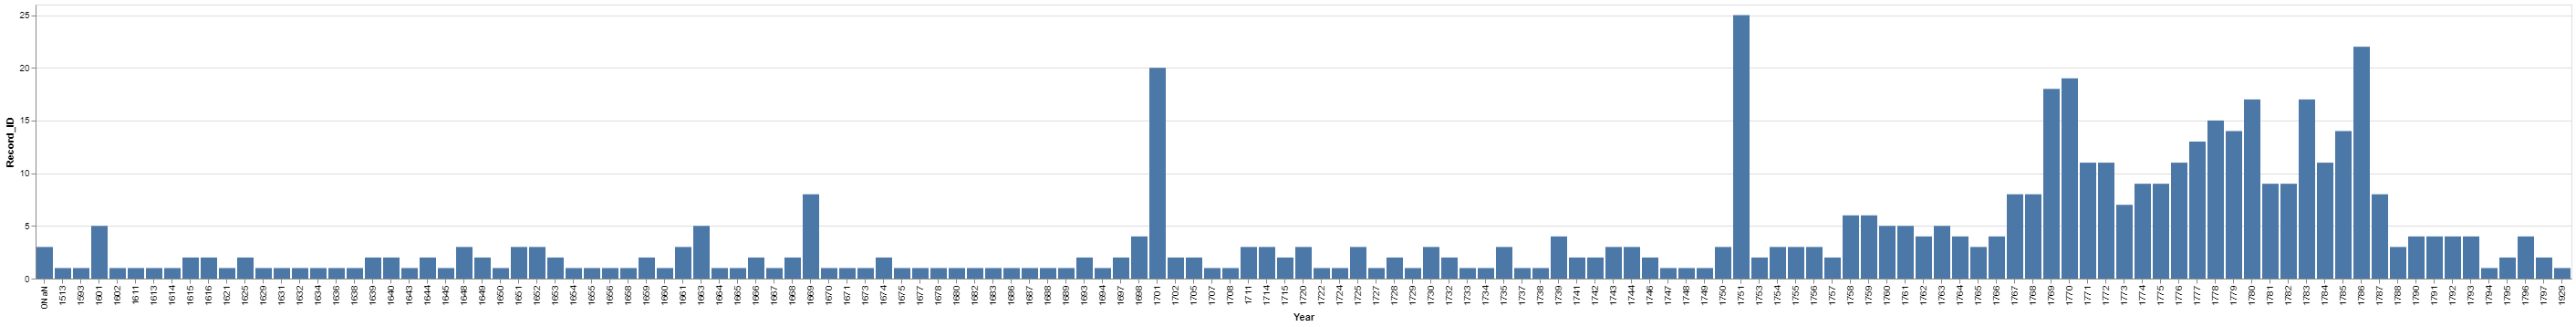

In [58]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('year(Date_1):O', title='Year'),
    y=alt.Y('count()', axis=alt.Axis(title='Record_ID')),
    tooltip=[alt.Tooltip('year(Date_1):O', title='Year'), alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)

chart

The chart shows that the majority of the lecture notes still preserved today were written in the XVIII century, with a special peak in the year 1751.

## 4.2 Distribution of manuscripts per Faculty

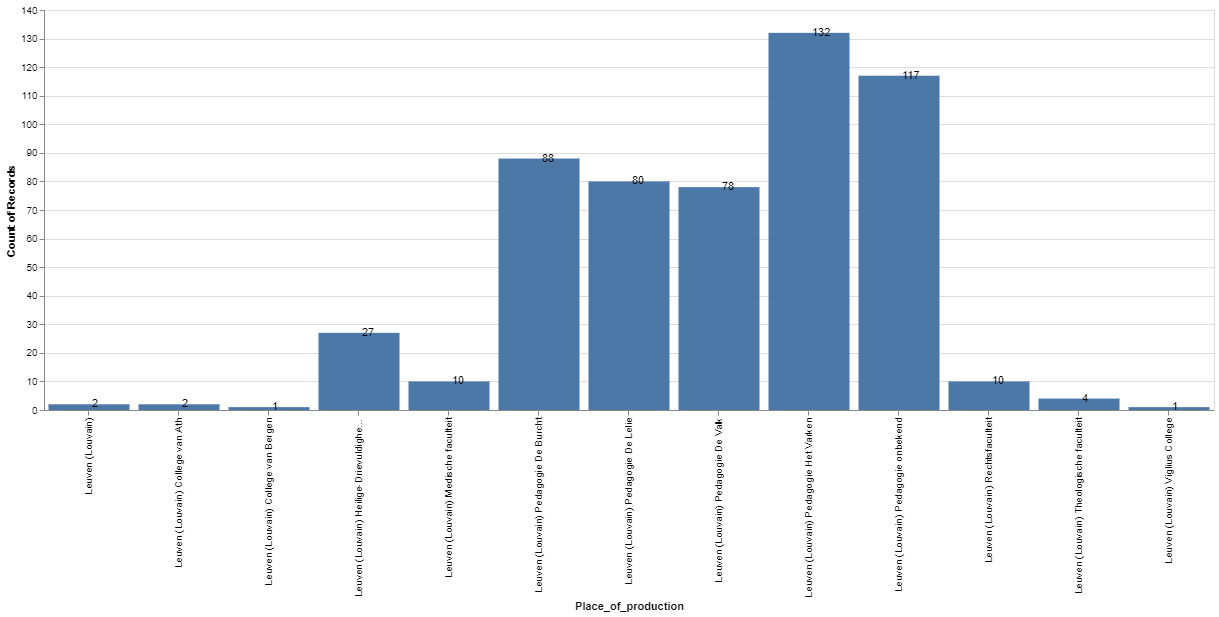

In [59]:
bars = alt.Chart(df).mark_bar().encode(
    x='Place_of_production',
    y="count(Record_ID)"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  
).encode(
    text='count(Record_ID)'
)

(bars + text).properties(height=400)

## 4.3 Distribution of manuscripts per Library Collection

It is also possible to embed in the Notebook visualizations created externally with **TABLEAU**.

- Create your visualization in Tableau
- Publish your visualization on Tableau Public (or on Tableau Online)
- Press the Share button on Tableau Public and copy the JS script
- To make the Tableau viz show up in the Jupyter Notebook, use the %%HTML *magic function* in a normal cell
- Paste the JS script

In [60]:
%%HTML
<div class='tableauPlaceholder' id='viz1592070381824' style='position: relative'><noscript><a href='https:&#47;&#47;public.tableau.com&#47;views&#47;Magister_Dixit_dataset&#47;Foglio1?:display_count=y&amp;publish=yes&amp;:origin=viz_share_link'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;Magister_Dixit_dataset&#47;Foglio1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Magister_Dixit_dataset&#47;Foglio1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ma&#47;Magister_Dixit_dataset&#47;Foglio1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592070381824');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## To be continued...